Assignment 6 and 7: PCA and Clustering Analysis

# Table of Contents
- [Assignment Questions](#assignment-questions)
- [Library Imports](#library-imports)
- [Load In Data](#load-in-data)
- [Basic Data Exploration](#basic-data-exploration)
- [Visualizing Data](#visualizing-data)
- [Pre-Processing Data](#pre-processing-data)
- [Perform PCA](#perform-pca)
    - [Perform PCA with Components](#perform-pca-with-components)
- [Cluster Analysis](#cluster-analysis)
    - [Optimal K and K means Clustering](#optimal-k-and-kmeans-clustering)
- [Clustering on PCA Data](#clustering-on-pca-data)
- [Visualizing Clusters](#visualizing-clusters)


# Assignment Questions

**From what perspective are you conducting the analysis? (Who are you? / Who are you working for?)**

I am conducting this analysis as a data scientist working for an e-commerce electronics retailer. The purpose of the analysis is to leverage PCA and clustering techniques to uncover patterns and segment customers based on electronic sales data.

**What is your question?**

The main question is: How can PCA and clustering techniques uncover distinct customer segments and reduce the dimensionality of the data to improve how interpretable the model is?

**Describe your dataset(s) including URL (if available).**

The dataset contains transaction-level information about electronic sales from September 2023 to September 2024. URL: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024


**What are your variables? Include variable type (binary, categorical, numeric).**

<u>Independent Variables:</u>

Age (numeric)
Gender (binary)
Product Type (categorical)
Quantity Sold (numeric)
Unit Price (numeric)
Rating (numeric)
Additionally, the dataset contains other binary, categorical, and numeric features. Only numeric features were selected for PCA, as the method works best with continuous data.

**How are your variables suitable for your analysis method?**

The selected numeric features were standardized, making them suitable for PCA. PCA helps reduce multicollinearity, which is prevalent among these features (high correlations between Quantity Sold and Unit Price). Clustering benefits from the standardized features, both in the raw data and the PCA-transformed space, to segment customers effectively.

**Compare the outputs from clustering and PCA (alone or with clustering). What are the strengths and limitations of each?**

Clustering on raw data produced interpretable clusters directly related to the original feature space. However, due to multicollinearity, some features may have dominated the clustering results.
PCA reduced the dimensionality of the dataset, providing a condensed representation of the data. When clustering was applied to the PCA-transformed space, it captured the most significant variations in the data, leading to better-separated clusters.

Comparison Table (Crosstab Output):

Cluster_PCA	Cluster_Raw 0	Cluster_Raw 1	Cluster_Raw 2

- 0------------5781-------------309---------------28

- 1-------------18---------------59--------------6726

- 2-------------26--------------6920--------------133

This crosstab suggests that while the clusters from PCA and raw data align in certain cases (e.g., Cluster 0 of PCA corresponds closely with Cluster 0 of Raw Data), there are significant differences, highlighting the benefits of dimensionality reduction in capturing distinct patterns.

**What conclusions can you draw from these two methods to answer your question?**

PCA effectively condensed the data into two principal components, explaining most of the variance (refer to the "Explained Variance vs. Number of Components" chart). The clustering performed on PCA-transformed data resulted in well-separated groups (see the "Clusters on PCA Components" scatterplot), making segmentation more interpretable.

Clustering on the raw data provided insights into natural groupings but was more influenced by high-dimensional noise and multicollinearity. The PCA-based clustering showed that dimensionality reduction can enhance cluster interpretability and better capture the underlying structure.

**What are your assumptions and limitations?**

<u>Assumptions:</u>

PCA adequately captures the most relevant variance in the data.
KMeans clustering assumes spherical clusters and equal variance, which may not fully reflect the true structure of the data.
The selected numeric features sufficiently represent customer and transaction behavior.

<u>Limitations:</u>

PCA components are linear combinations of the original features, which may lose some interpretability.
The elbow method for determining the number of clusters is subjective, and the chosen number (k=3) may not fully represent the data's natural structure.
Clustering results are influenced by feature scaling, and certain categorical or binary features were excluded.

**What robustness checks did you perform or would you perform?**

Alternative Clustering Algorithms: Evaluate the performance of hierarchical clustering or DBSCAN to compare with KMeans results.
Cross-Validation of PCA: Perform PCA on different subsets of the data to ensure consistency in the principal components.
Hyperparameter Tuning: Experiment with different values of k for KMeans to assess the stability of clustering results.
Feature Sensitivity Analysis: Re-run PCA and clustering with different sets of numeric features to validate the robustness of the segmentation.




# Library Imports

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For PCA and clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load In Data

In [29]:
# Load the data
# file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"

file_path = "C:/Users/matt/Downloads/archive (2)/Electronic_sales_Sep2023-Sep2024.csv"

# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Basic Data Exploration

In [30]:
# Explore the data
# Display the first few rows
print("First few rows of the data:")
display(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the data:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56



Data types:
Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

Summary statistics:


,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000



Missing values in each column:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


# Visualizing Data

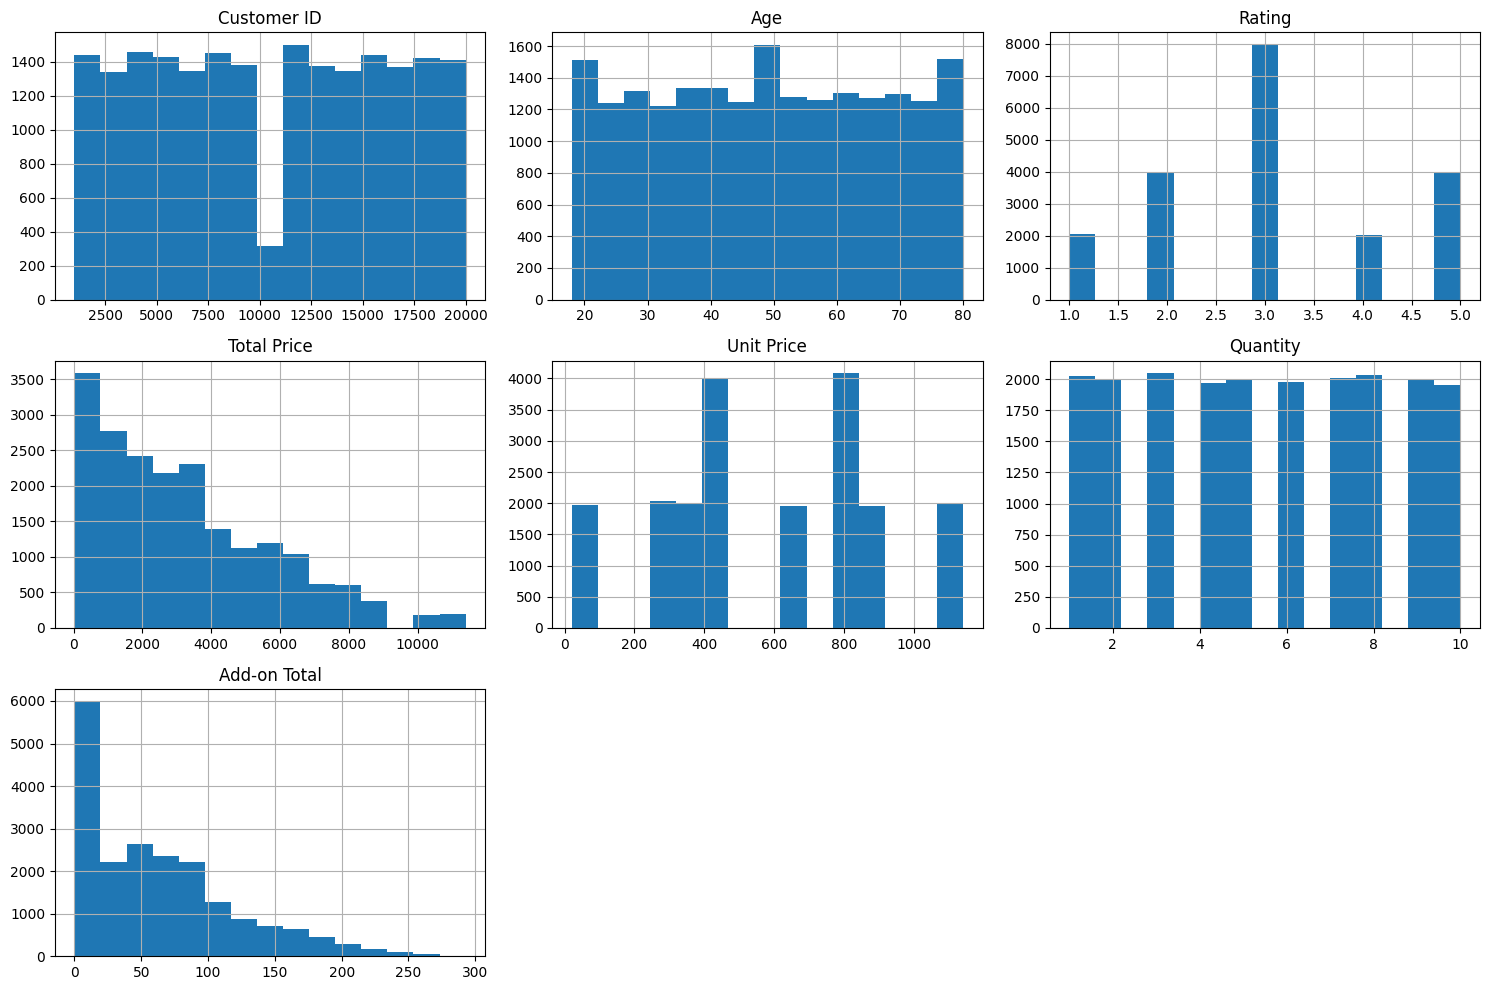

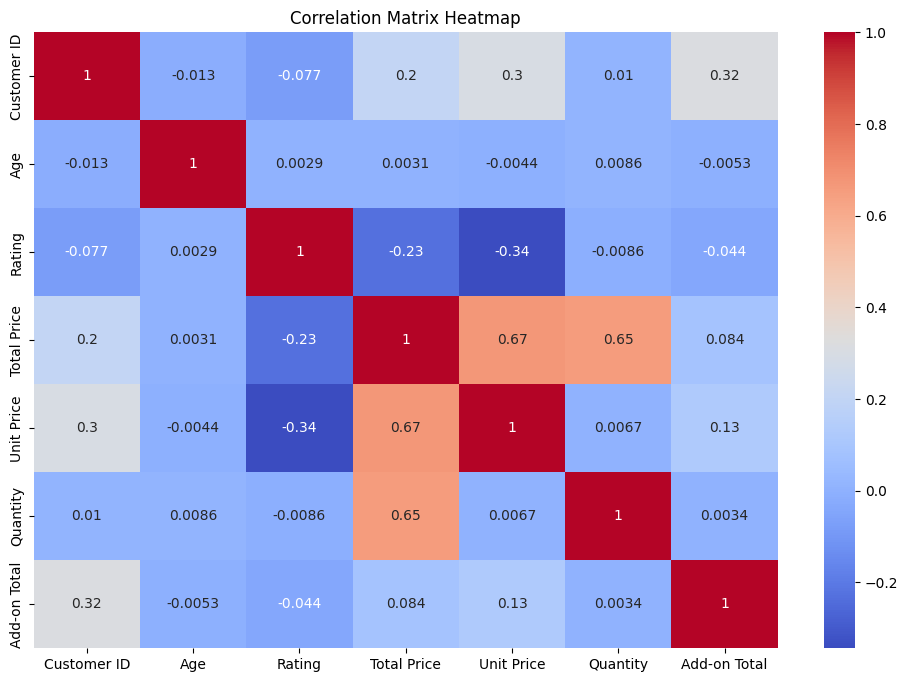

In [31]:
# Data visualization
# Histograms of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pre-processing Data

In [32]:
# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# Perform PCA 

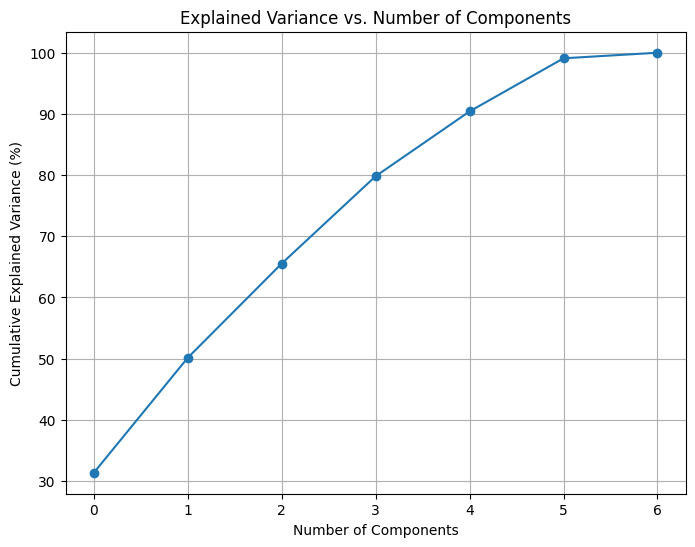

In [33]:
# Fit PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Perform PCA with Components

In [34]:
# Decide on the number of components (e.g., 2 components explain sufficient variance)
n_components = 4 # chose 4 components because the threshold for cumulative explained variance begins at 5 components

# Perform PCA with selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])


# Cluster Analysis

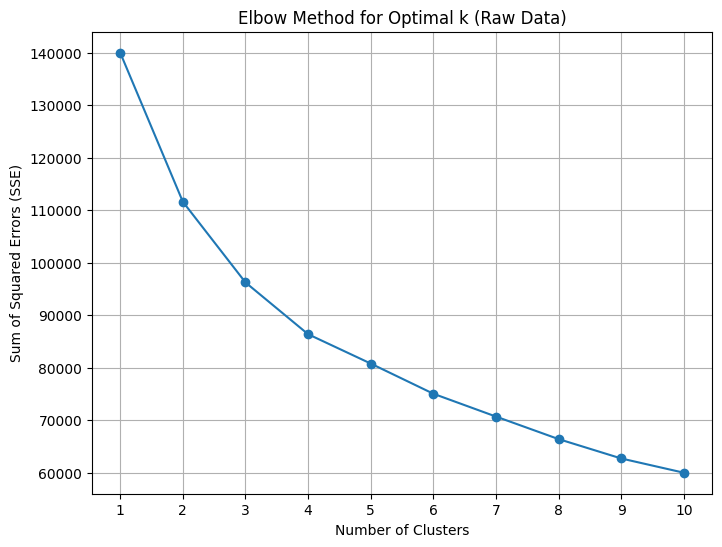

In [35]:
# Determine optimal number of clusters using Elbow method
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (Raw Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Optimal K and KMeans Clustering 

In [36]:
# From the plot, choose optimal k (e.g., k=3)
k_optimal = 3

# KMeans clustering on raw data
kmeans_raw = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster_Raw'] = kmeans_raw.fit_predict(df_scaled)

# Clustering on PCA Data

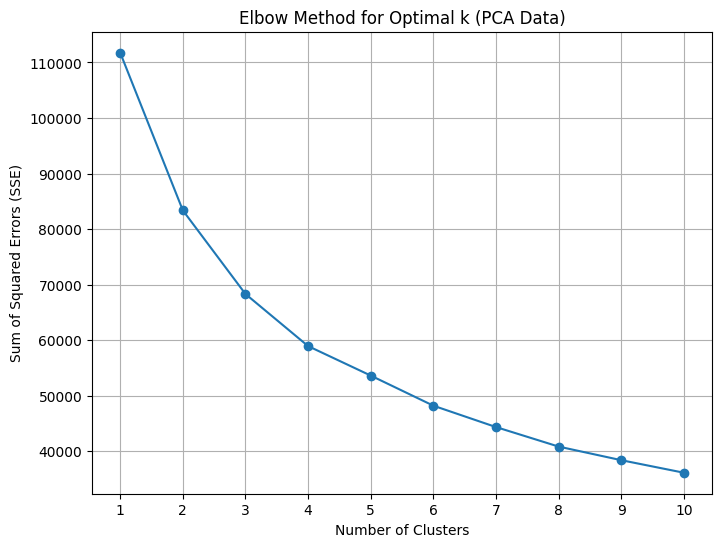

In [37]:
# Determine optimal number of clusters using Elbow method
sse_pca = []
for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(principal_df)
    sse_pca.append(kmeans_pca.inertia_)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8,6))
plt.plot(k_range, sse_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Again, choose k=3
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
principal_df['Cluster_PCA'] = kmeans_pca.fit_predict(principal_df)

# Visualizing Clusters

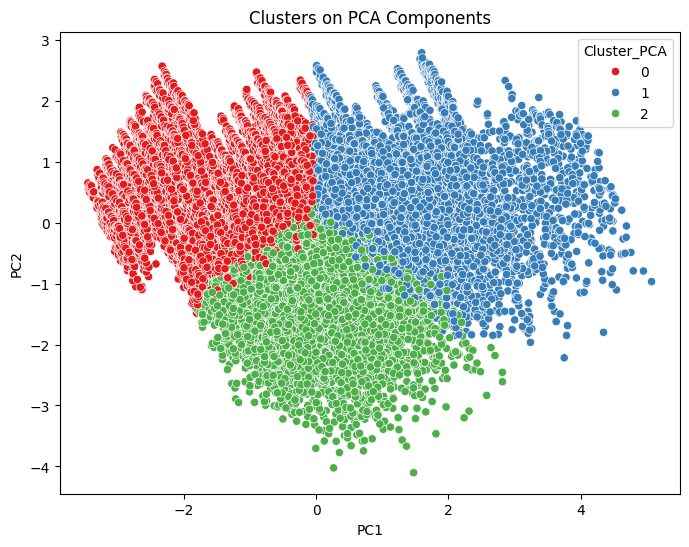

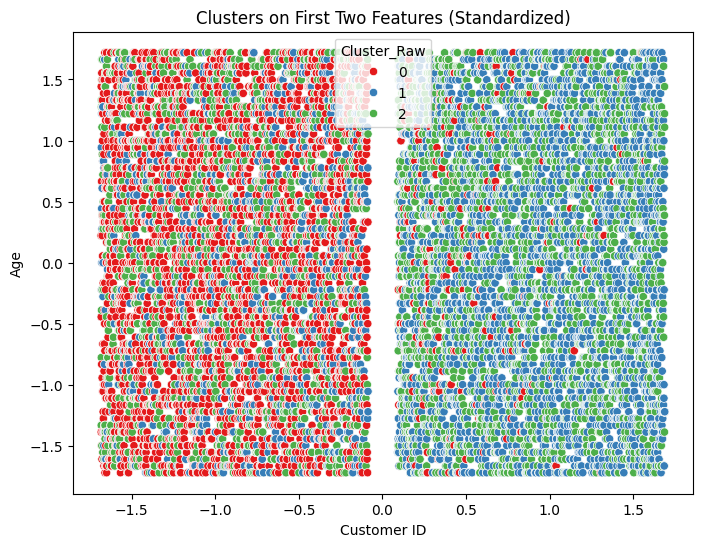

In [38]:
# Visualize clusters on PCA data
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=principal_df, palette='Set1')
plt.title('Clusters on PCA Components')
plt.show()

# Visualize clusters on raw data
# Since the data is high-dimensional, we'll use the first two standardized features
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=df['Cluster_Raw'], palette='Set1')
plt.title('Clusters on First Two Features (Standardized)')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.show()

In [39]:
# Compare clustering results
# Merge cluster labels
df_clusters = df[['Cluster_Raw']].join(principal_df[['Cluster_PCA']])

# Crosstab of clusters
cluster_comparison = pd.crosstab(df_clusters['Cluster_Raw'], df_clusters['Cluster_PCA'])
print("\nCrosstab of clusters from raw data and PCA data:")
print(cluster_comparison)


Crosstab of clusters from raw data and PCA data:
Cluster_PCA     0     1     2
Cluster_Raw                  
0            5781    18    26
1             309    59  6920
2              28  6726   133
